# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [3]:
# Viz mantra
from matplotlib import pyplot as plt
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'

import seaborn as sns
sns.set_context('poster')
sns.set(rc={'figure.figsize': (16., 9.)})
sns.set_style('whitegrid')

import numpy as np
import pandas as pd
import random

# Welcome to SciPy!
from scipy.stats import trim_mean, mode, skew, gaussian_kde, pearsonr, spearmanr


# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [41]:
GSAF = r"C:\Users\lenovo\Desktop\descr_stats\lab-descriptive-stats\your-code\Temp_States.csv"

temp = pd.read_csv(GSAF, encoding = "ISO-8859-1")

#### Print `temp`

In [42]:
print(temp)
temp

         City        State  Temperature
0         NYC     New York    19.444444
1      Albany     New York     9.444444
2     Buffalo     New York     3.333333
3    Hartford  Connecticut    17.222222
4  Bridgeport  Connecticut    14.444444
5      Treton   New Jersey    22.222222
6      Newark   New Jersey    20.000000


,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [43]:
temp.dtypes

City            object
State           object
Temperature    float64
dtype: object

#### Select the rows where state is New York

In [23]:
only_ny = temp[temp["State"] == 'New York']
only_ny

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [25]:
mean_ny_temp = only_ny["Temperature"].mean()
print(mean_ny_temp)

10.74074074074074


#### We want to know cities and states with Temperature above 15 degress Celcius

In [27]:
above_15 = temp[temp["Temperature"] > 15]
above_15

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [76]:
below_15 = temp[temp["Temperature"] > 15]
below_15["City"]

0         NYC
3    Hartford
5      Treton
6      Newark
Name: City, dtype: object

#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [77]:
between = temp[temp["Temperature"] > 15]
between = between[between["Temperature"] < 20]
between["City"]

0         NYC
3    Hartford
Name: City, dtype: object

#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [32]:
only_ny = temp[temp["State"] == 'New York']
only_cn = temp[temp["State"] == 'Connecticut']
only_nj = temp[temp["State"] == 'New Jersey']

In [35]:
mean_ny = only_ny["Temperature"].mean()
print(mean_ny)
mean_cn = only_cn["Temperature"].mean()
print(mean_cn)
mean_nj = only_nj["Temperature"].mean()
print(mean_nj)

10.74074074074074
15.833333333333332
21.11111111111111


In [38]:
print(np.std(only_ny["Temperature"]))
print(np.std(only_cn["Temperature"]))
print(np.std(only_nj["Temperature"]))

6.64089669520041
1.3888888888888884
1.1111111111111107


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [44]:
GSAF = r"C:\Users\lenovo\Desktop\descr_stats\lab-descriptive-stats\your-code\Employee.csv"

employee = pd.read_csv(GSAF, encoding = "ISO-8859-1")

#### Explore the data types of the Temp dataframe. Comment your results

In [49]:
print("No comments")
employee.dtypes

No comments


Name          object
Department    object
Education     object
Gender        object
Title         object
Years          int64
Salary         int64
dtype: object

#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

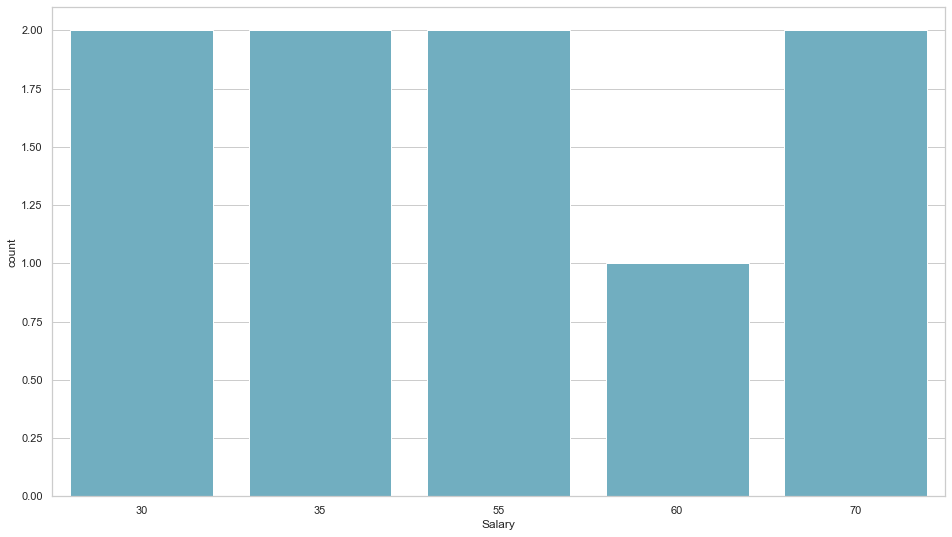

In [58]:
sns.countplot(x=employee["Salary"], color='c')

<AxesSubplot:xlabel='Years', ylabel='count'>

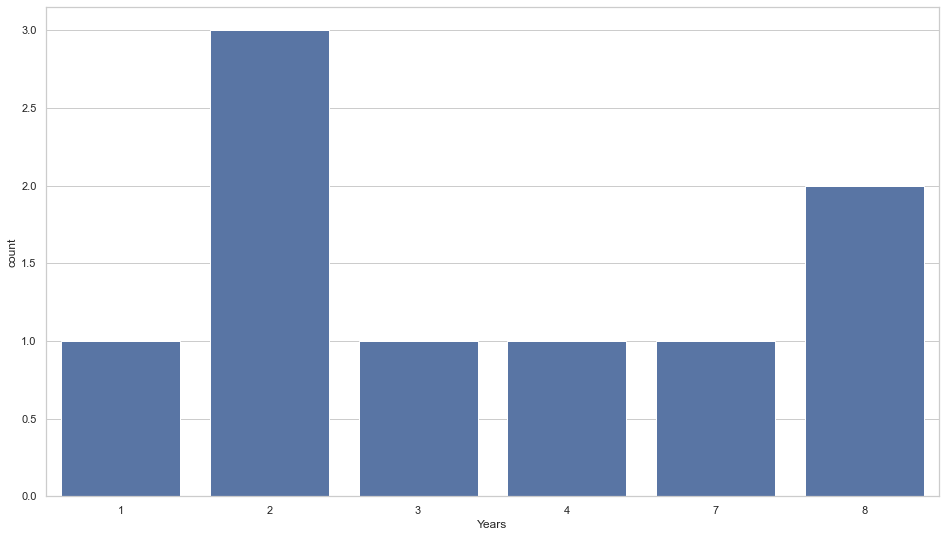

In [60]:
sns.countplot(x=employee["Years"], color='b')

#### What's the average salary in this company?

In [61]:
print(employee["Salary"].mean())

48.888888888888886


#### What's the highest salary?

In [62]:
print(employee["Salary"].max())

70


#### What's the lowest salary?

In [63]:
print(employee["Salary"].min())


30


#### Who are the employees with the lowest salary?

In [66]:
low = employee[employee["Salary"] == employee["Salary"].min()]
print(low["Name"])

1    Maria
2    David
Name: Name, dtype: object


#### Could you give all the information about an employee called David?

In [70]:
print(low.loc[low["Name"] == "David"])

    Name Department Education Gender    Title  Years  Salary
2  David         HR    Master      M  analyst      2      30


#### Could you give only David's salary?

In [73]:
low.loc[low["Name"] == "David"]["Salary"]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Print all the rows where job title is associate

In [74]:
print(employee.loc[employee["Title"] == "associate"])

     Name Department Education Gender      Title  Years  Salary
4  Samuel      Sales    Master      M  associate      3      55
5     Eva      Sales  Bachelor      F  associate      2      55
7   Pedro         IT       Phd      M  associate      7      60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [75]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [84]:
employee.iloc[[0,1,2]]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [90]:
print(employee.loc[(employee["Title"] == "associate") & (employee["Salary"] > 55)])

    Name Department Education Gender      Title  Years  Salary
7  Pedro         IT       Phd      M  associate      7      60


In [91]:
employee["Name"]

0      Jose
1     Maria
2     David
3     Sonia
4    Samuel
5       Eva
6    Carlos
7     Pedro
8       Ana
Name: Name, dtype: object

In [92]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [97]:
number_years = employee.groupby('Years')
number_years.first()

,Name,Department,Education,Gender,Title,Salary
Years,,,,,,
1,Jose,IT,Bachelor,M,analyst,35
2,Maria,IT,Master,F,analyst,30
3,Samuel,Sales,Master,M,associate,55
4,Sonia,HR,Bachelor,F,analyst,35
7,Pedro,IT,Phd,M,associate,60
8,Carlos,IT,Master,M,VP,70


####  What is the average Salary per title?

In [103]:
titles = employee.groupby('Title')
titles["Salary"].mean() # it works

Title
VP           70.000000
analyst      32.500000
associate    56.666667
Name: Salary, dtype: float64

#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*

##### - In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.

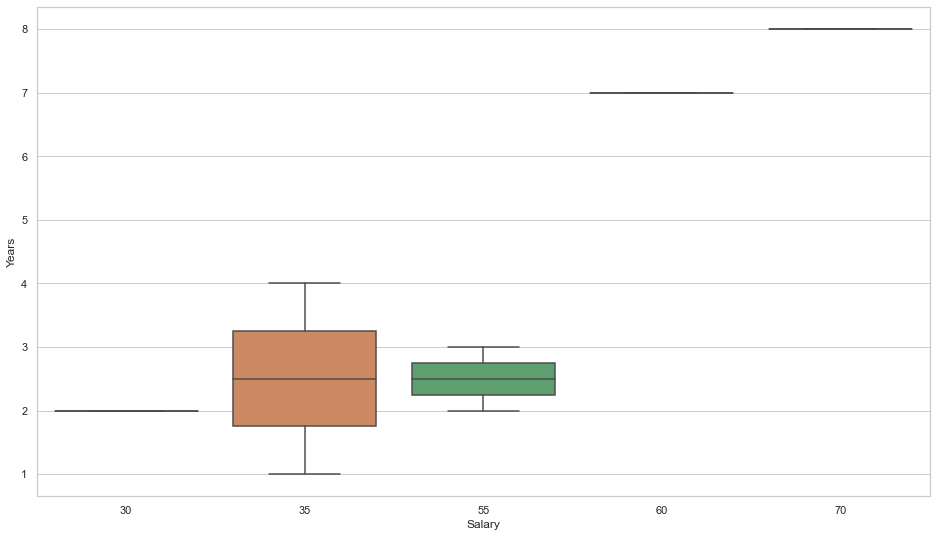

In [106]:
sns.boxplot(x="Salary", y= "Years", data=employee);

In [108]:
print(employee.Salary.quantile(0.25))
print(employee.Years.quantile(0.25))

35.0
2.0


In [109]:
print(employee.Salary.quantile(0.75))
print(employee.Years.quantile(0.75))

60.0
7.0


#### Is the mean salary per gender different?

In [112]:
print(employee[employee["Gender"]== "F"]["Salary"].mean())
print(employee[employee["Gender"]== "M"]["Salary"].mean())
print("Yes")

47.5
50.0
Yes


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [118]:
department = employee.groupby('Department')
print("Mean")
print(department["Salary"].mean())
print("Max")
print(department["Salary"].max())
print("Min")
print(department["Salary"].min())

print("Mean")
print(department["Years"].mean())
print("Max")
print(department["Years"].max())
print("Min")
print(department["Years"].min())

Mean
Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64
Max
Department
HR       70
IT       70
Sales    55
Name: Salary, dtype: int64
Min
Department
HR       30
IT       30
Sales    55
Name: Salary, dtype: int64
Mean
Department
HR       4.666667
IT       4.500000
Sales    2.500000
Name: Years, dtype: float64
Max
Department
HR       8
IT       8
Sales    3
Name: Years, dtype: int64
Min
Department
HR       2
IT       1
Sales    2
Name: Years, dtype: int64


### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [119]:
GSAF = r"C:\Users\lenovo\Desktop\descr_stats\lab-descriptive-stats\your-code\Orders.csv"

orders = pd.read_csv(GSAF, encoding = "ISO-8859-1")

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [129]:
print(orders.dtypes)


Unnamed: 0        int64
InvoiceNo         int64
StockCode        object
year              int64
month             int64
day               int64
hour              int64
Description      object
Quantity          int64
InvoiceDate      object
UnitPrice       float64
CustomerID        int64
Country          object
amount_spent    float64
dtype: object


In [128]:
print(orders.describe())

          Unnamed: 0      InvoiceNo           year          month  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean   278465.221859  560617.126645    2010.934259       7.612537   
std    152771.368303   13106.167695       0.247829       3.416527   
min         0.000000  536365.000000    2010.000000       1.000000   
25%    148333.750000  549234.000000    2011.000000       5.000000   
50%    284907.500000  561893.000000    2011.000000       8.000000   
75%    410079.250000  572090.000000    2011.000000      11.000000   
max    541908.000000  581587.000000    2011.000000      12.000000   

                 day           hour       Quantity      UnitPrice  \
count  397924.000000  397924.000000  397924.000000  397924.000000   
mean        3.614555      12.728247      13.021823       3.116174   
std         1.928274       2.273535     180.420210      22.096788   
min         1.000000       6.000000       1.000000       0.000000   
25%         2.000000      11.0000

In [130]:
orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397919,541904,581587,22613,2011,12,5,12,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680,France,10.20
397920,541905,581587,22899,2011,12,5,12,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680,France,12.60
397921,541906,581587,23254,2011,12,5,12,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680,France,16.60
397922,541907,581587,23255,2011,12,5,12,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680,France,16.60


####  What is the average Purchase Price?

In [131]:
print(orders["UnitPrice"].mean())

3.116174480549152


#### What were the highest and lowest purchase prices? 

In [132]:
print(orders["UnitPrice"].max())

8142.75


In [133]:
print(orders["UnitPrice"].min())

0.0


In [142]:
orders.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'year', 'month', 'day', 'hour',
       'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID',
       'Country', 'amount_spent'],
      dtype='object')

#### Select all the customers we have in Spain

In [148]:
only_spain = orders[orders["Country"] == "Spain"]
only_spain = only_spain.groupby("CustomerID")
only_spain.first()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
CustomerID,,,,,,,,,,,,,
12354,166267,550911,23201,2011,4,4,13,jumbo bag alphabet,10,2011-04-21 13:11:00,2.08,Spain,20.80
12417,171221,551398,20971,2011,4,4,13,pink blue felt craft trinket box,12,2011-04-28 13:09:00,1.25,Spain,15.00
12421,69722,541980,85206A,2011,1,1,15,cream felt easter egg basket,6,2011-01-24 15:09:00,1.65,Spain,9.90
12442,531420,580955,21974,2011,12,2,14,set of 36 paisley flower doilies,12,2011-12-06 14:22:00,1.45,Spain,17.40
12445,478969,577125,85034B,2011,11,4,18,3 white choc morris boxed candles,24,2011-11-17 18:43:00,1.25,Spain,30.00
12448,420303,572886,22557,2011,10,3,13,plasters in tin vintage paisley,12,2011-10-26 13:46:00,1.65,Spain,19.80
12450,232087,557303,22922,2011,6,7,14,fridge magnets us diner assorted,12,2011-06-19 14:36:00,0.85,Spain,10.20
12454,398626,571255,82494L,2011,10,5,17,wooden frame antique white,72,2011-10-14 17:13:00,2.55,Spain,183.60
12455,212267,555470,POST,2011,6,5,11,postage,1,2011-06-03 11:33:00,28.00,Spain,28.00


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [164]:
len(only_spain.first())


30

#### Select all the customers who have bought more than 50 items ?

In [160]:
by_customer = orders.groupby("CustomerID").first().reset_index()
by_customer = by_customer[by_customer["Quantity"] > 50]
by_customer

,CustomerID,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,Country,amount_spent
0,12346,61619,541431,23166,2011,1,2,10,medium ceramic top storage jar,74215,2011-01-18 10:01:00,1.04,United Kingdom,77183.60
2,12348,34083,539318,84992,2010,12,4,19,72 sweetheart fairy cake cases,72,2010-12-16 19:09:00,0.55,Finland,39.60
20,12370,29732,538826,85123A,2010,12,2,12,white hanging heart t-light holder,64,2010-12-14 12:58:00,2.55,Cyprus,163.20
50,12409,222258,556415,84755,2011,6,5,12,colour glass t-light holder hanging,96,2011-06-10 12:19:00,0.65,Switzerland,62.40
55,12415,45511,540267,22078,2011,1,4,11,ribbon reel lace design,120,2011-01-06 11:12:00,1.85,Australia,222.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4271,18194,345659,567172,22075,2011,9,7,13,6 ribbons elegant christmas,144,2011-09-18 13:29:00,1.45,United Kingdom,208.80
4289,18220,169520,551184,21232,2011,4,3,9,strawberry ceramic trinket box,144,2011-04-27 09:03:00,1.06,United Kingdom,152.64
4307,18240,414515,572462,15056BL,2011,10,1,13,edwardian parasol black,60,2011-10-24 13:06:00,4.95,United Kingdom,297.00
4311,18246,165325,550782,71053,2011,4,3,13,white metal lantern,60,2011-04-20 13:55:00,3.39,United Kingdom,203.40


#### Select orders from Spain that are above 50 items

In [169]:
quantity_50 = orders[orders["Quantity"] > 50]
quantity_50

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397720,541702,581566,23404,2011,12,5,11,home sweet home blackboard,144,2011-12-09 11:50:00,3.26,18102,United Kingdom,469.44
397721,541703,581567,21417,2011,12,5,11,cockle shell dish,84,2011-12-09 11:56:00,0.79,16626,United Kingdom,66.36
397729,541711,581567,21326,2011,12,5,11,aged glass silver t-light holder,144,2011-12-09 11:56:00,0.55,16626,United Kingdom,79.20
397761,541746,581571,23167,2011,12,5,12,small ceramic top storage jar,96,2011-12-09 12:00:00,0.69,15311,United Kingdom,66.24


#### Select all free orders

In [171]:
free_orders =  orders[orders["UnitPrice"] == 0]
free_orders

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
137127,198383,554037,22619,2011,5,5,14,set of 6 soldier skittles,80,2011-05-20 14:13:00,0.0,12415,Australia,0.0
208950,298054,562973,23157,2011,8,4,11,set of 6 nativity magnets,240,2011-08-11 11:42:00,0.0,14911,EIRE,0.0
223931,314745,564651,23270,2011,8,5,14,set of 2 ceramic painted hearts,96,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
223932,314746,564651,23268,2011,8,5,14,set of 2 ceramic christmas reindeer,192,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
223933,314747,564651,22955,2011,8,5,14,36 foil star cake cases,144,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
223934,314748,564651,21786,2011,8,5,14,polkadot rain hat,144,2011-08-26 14:19:00,0.0,14646,Netherlands,0.0
319882,436428,574138,23234,2011,11,4,11,biscuit tin vintage christmas,216,2011-11-03 11:26:00,0.0,12415,Australia,0.0
370473,502122,578841,84826,2011,11,5,15,asstd design 3d paper stickers,12540,2011-11-25 15:57:00,0.0,13256,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [199]:
GSAF = r"C:\Users\lenovo\Desktop\descr_stats\lab-descriptive-stats\your-code\Orders.csv"

orders = pd.read_csv(GSAF, encoding = "ISO-8859-1")

In [201]:
def lunch_bag(x):
    if "lunch bag" in x:
        return x
    else:
        return "No lunch bag"
df = orders[:]
df["Description"] = df["Description"].apply(lunch_bag)
df = df.drop(df[df["Description"] == "No lunch bag"].index)
df

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [203]:
df_2011 = df[df["year"] == 2011]
df_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436,581486,23207,2011,12,5,9,lunch bag alphabet design,10,2011-12-09 09:38:00,1.65,17001,United Kingdom,16.50
397713,541695,581538,20727,2011,12,5,11,lunch bag black skull.,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397714,541696,581538,20725,2011,12,5,11,lunch bag red retrospot,1,2011-12-09 11:34:00,1.65,14446,United Kingdom,1.65
397877,541862,581581,23681,2011,12,5,12,lunch bag red vintage doily,10,2011-12-09 12:20:00,1.65,17581,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='Quantity', ylabel='count'>

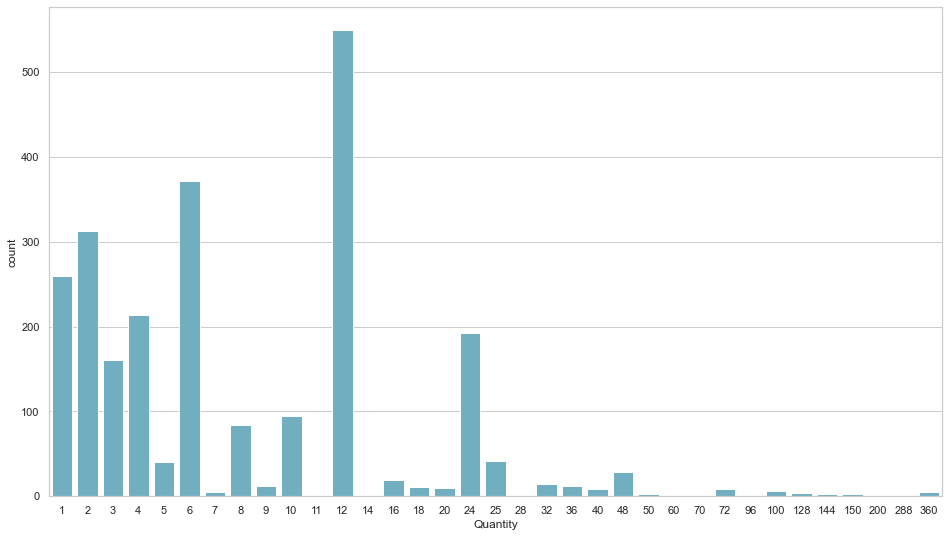

In [221]:
only_spain = orders[orders["Country"] == "Spain"]
sns.countplot(x=only_spain["Quantity"], color='c')

#### Select all orders made in the month of August

In [210]:
only_august = orders[orders["month"] == 8]
only_august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688,565067,22644,2011,8,3,17,ceramic cherry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226484,320689,565067,22645,2011,8,3,17,ceramic heart fairy cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90
226485,320690,565067,22637,2011,8,3,17,piggy bank retrospot,2,2011-08-31 17:16:00,2.55,15856,United Kingdom,5.10
226486,320691,565067,22646,2011,8,3,17,ceramic strawberry cake money bank,2,2011-08-31 17:16:00,1.45,15856,United Kingdom,2.90


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [211]:
len(only_august)

27013

#### What's the  average amount of money spent by country

In [225]:
by_country = orders.groupby("Country").mean().reset_index()
by_country[["Country", "amount_spent"]]

,Country,amount_spent
0,Australia,116.895620
1,Austria,25.624824
2,Bahrain,32.258824
3,Belgium,20.283772
4,Brazil,35.737500
5,Canada,24.280662
6,Channel Islands,27.340160
7,Cyprus,22.134169
8,Czech Republic,33.069600
9,Denmark,49.882474


#### What's the most expensive item?

In [224]:
orders["UnitPrice"].max()

8142.75

#### What was the average amount spent per year ?

In [227]:
by_country = orders.groupby("year").mean().reset_index()
by_country[["year", "amount_spent"]]

,year,amount_spent
0,2010,21.892733
1,2011,22.430074
